# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.options.display.max_rows
pd.options.display.max_columns = None

# Modelo Fifa goles-reales

In [2]:
df_fifa22 = pd.read_csv("../data/players_22.csv")
df_reales = pd.read_csv("../data/All_stats_2022_id.csv")

In [3]:
df_fifa22.loc[:,["short_name","overall","value_eur","pace","shooting"]]
# df_fifa22.head()

,short_name,overall,value_eur,pace,shooting
0,P. Mainka,74,4400000.0,50.0,39.0
1,T. Kleindienst,73,4100000.0,66.0,75.0
2,K. Müller,72,1600000.0,NaN,NaN
3,O. Hüsing,72,2000000.0,47.0,32.0
4,M. Busch,72,2500000.0,84.0,49.0
...,...,...,...,...,...
19234,B. Sævarsson,63,NaN,58.0,46.0
19235,O. Valakari,63,NaN,62.0,62.0
19236,M. Stamenic,62,NaN,68.0,51.0
19237,S. Roux,61,NaN,74.0,47.0


In [4]:
df_fifa22.loc[:,["short_name","overall","value_eur","pace","shooting"]]

,short_name,overall,value_eur,pace,shooting
0,P. Mainka,74,4400000.0,50.0,39.0
1,T. Kleindienst,73,4100000.0,66.0,75.0
2,K. Müller,72,1600000.0,NaN,NaN
3,O. Hüsing,72,2000000.0,47.0,32.0
4,M. Busch,72,2500000.0,84.0,49.0
...,...,...,...,...,...
19234,B. Sævarsson,63,NaN,58.0,46.0
19235,O. Valakari,63,NaN,62.0,62.0
19236,M. Stamenic,62,NaN,68.0,51.0
19237,S. Roux,61,NaN,74.0,47.0


In [5]:
df_reales.replace('-',0, inplace=True);

In [6]:
df_reales["Goals_x"] = df_reales["Goals_x"].astype(int)

In [7]:
df = df_reales[["nom_jugad", "id_fifa", "Goals_x"]]

In [8]:
df = df.drop_duplicates(subset=['nom_jugad'], keep='first')

In [9]:
# Filtrar todas las filas que tienen duplicados en 'id_fifa'
df_duplicados = df[df.duplicated(subset="id_fifa", keep=False)]

df_duplicados.head()


,nom_jugad,id_fifa,Goals_x
0,Aaron Ciammaglichella,236295,0
5,Aarón Escandell,236295,0
6,Aarón Martín,236295,0
8,Abdallah Sima,247180,0
9,Abde Ezzalzouli,247180,1


In [10]:
# Obtener los valores de 'id_fifa' cuyo conteo sea distinto de 1
id_fifa_not_one = df["id_fifa"].value_counts()[df["id_fifa"].value_counts() != 1].index

df[(df["id_fifa"].isin(id_fifa_not_one)) & (df["Goals_x"]>1)].head()



,nom_jugad,id_fifa,Goals_x
71,Alassane Pléa,193301,2
80,Alberto Moreno,263945,3
97,Alejandro Catena,225201,2
98,Alejandro Garnacho,225201,3
99,Alejandro Marqués,225201,3


In [11]:
df_reales.iloc[:,20:30].head()

,Player_y,Apps_y,Mins_y,xG,Goals_y,xGDiff,xG/90,Shots,xG/Shots,Rating_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"332\nAaron Cresswell\nWest Ham, 34, D(CL),M(L)",0(4),26.0,0.04,0,-0.04,0.14,1.0,0.04,6.08
2,"315\nAaron Meijers\nRKC Waalwijk, 37, D(L),DMC...",7(1),516.0,0.11,0,-0.11,0.02,2.0,0.06,6.06
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"88\nAaron Wan-Bissaka\nWest Ham, 26, D(LR),M(R)",9(1),815.0,0.08,0,-0.08,0.01,3.0,0.03,6.82


In [12]:
import pandas as pd

# Aumentar el número máximo de filas a mostrar
pd.set_option('display.max_rows', None)

# Ahora puedes ver todos los valores de la columna 'posicion_x'
print(df_reales["posicion_x"].value_counts())


posicion_x
D(C)               338
FW                 235
DMC                229
GK                 202
M(C)               182
Forward            171
AM(CLR),FW         142
Midfielder         139
Defender           116
D(L),M(L)          108
M(CLR),FW           83
M(CLR)              80
D(R),M(R)           75
D(C),DMC            71
D(CL)               67
D(CR)               60
AM(C)               53
D(L)                52
AM(CLR)             52
AM(L),FW            50
AM(R)               49
AM(LR)              47
D(CL),M(L)          46
D(R)                44
AM(CR)              44
M(CL)               42
AM(CL),FW           39
AM(LR),FW           38
AM(CR),FW           38
AM(C),FW            36
M(CR)               36
M(LR)               32
AM(L)               31
D(LR),M(R)          30
D(CR),M(R)          27
AM(CL)              26
D(CLR),M(R)         22
D(CR),DMC           22
D(CLR)              20
D(R),M(CR)          17
D(C),M(C)           16
D(R),M(CLR),FW      16
AM(R),FW            16


In [13]:
df_reales[df_reales["Player_y"].notna()].iloc[:,15:50].head()

,num_x,nom_jugad,equipo_x,ns_x,posicion_x,Player_y,Apps_y,Mins_y,xG,Goals_y,xGDiff,xG/90,Shots,xG/Shots,Rating_y,Año_y,Liga_y,num_y,equipo_y,ns_y,posicion_y,id_fifa
1,403,Aaron Cresswell,West Ham,34,"D(CL),M(L)","332\nAaron Cresswell\nWest Ham, 34, D(CL),M(L)",0(4),26.0,0.04,0,-0.04,0.14,1.0,0.04,6.08,2022.0,Ing,332.0,West Ham,34.0,"D(CL),M(L)",189615
2,396,Aaron Meijers,RKC Waalwijk,37,"D(L),DMC,M(L)","315\nAaron Meijers\nRKC Waalwijk, 37, D(L),DMC...",7(1),516.0,0.11,0,-0.11,0.02,2.0,0.06,6.06,2022.0,Ned,315.0,RKC Waalwijk,37.0,"D(L),DMC,M(L)",188621
4,98,Aaron Wan-Bissaka,West Ham,26,"D(LR),M(R)","88\nAaron Wan-Bissaka\nWest Ham, 26, D(LR),M(R)",9(1),815.0,0.08,0,-0.08,0.01,3.0,0.03,6.82,2022.0,Ing,88.0,West Ham,26.0,"D(LR),M(R)",229880
6,118,Aarón Martín,Genoa,27,"D(L),M(L)","106\nAarón Martín\nGenoa, 27, D(L),M(L)",11,921.0,0.42,0,-0.42,0.04,9.0,0.05,6.71,2022.0,Ita,106.0,Genoa,27.0,"D(L),M(L)",236295
7,275,Abakar Sylla,Strasbourg,21,D(C),"233\nAbakar Sylla\nStrasbourg, 21, D(C)",7(3),586.0,0.53,1,0.47,0.08,5.0,0.11,6.39,2022.0,Fra,233.0,Strasbourg,21.0,D(C),246790


In [14]:
df_reales["Apps_x"]

0         0(1)
1         0(4)
2         7(1)
3            9
4         9(1)
5         4(1)
6           11
7         7(3)
8         3(3)
9         6(4)
10        3(3)
11        1(1)
12        0(2)
13        3(1)
14        8(1)
15           4
16       10(1)
17        8(2)
18        6(5)
19       8(17)
20        7(1)
21           9
22        5(3)
23        0(1)
24        0(7)
25        7(2)
26        2(4)
27        4(3)
28        6(6)
29       10(1)
30        3(2)
31        6(5)
32        2(1)
33           8
34        4(7)
35        4(7)
36        9(2)
37        9(2)
38        0(2)
39        8(1)
40          11
41        1(5)
42      17(16)
43        4(6)
44       24(8)
45        4(5)
46        1(1)
47        0(1)
48        9(1)
49        4(2)
50        4(5)
51          11
52       10(1)
53          31
54          11
55        0(1)
56        4(5)
57        7(1)
58        0(1)
59        0(1)
60        0(2)
61           2
62       15(5)
63        8(3)
64          13
65       9(10)
66       1

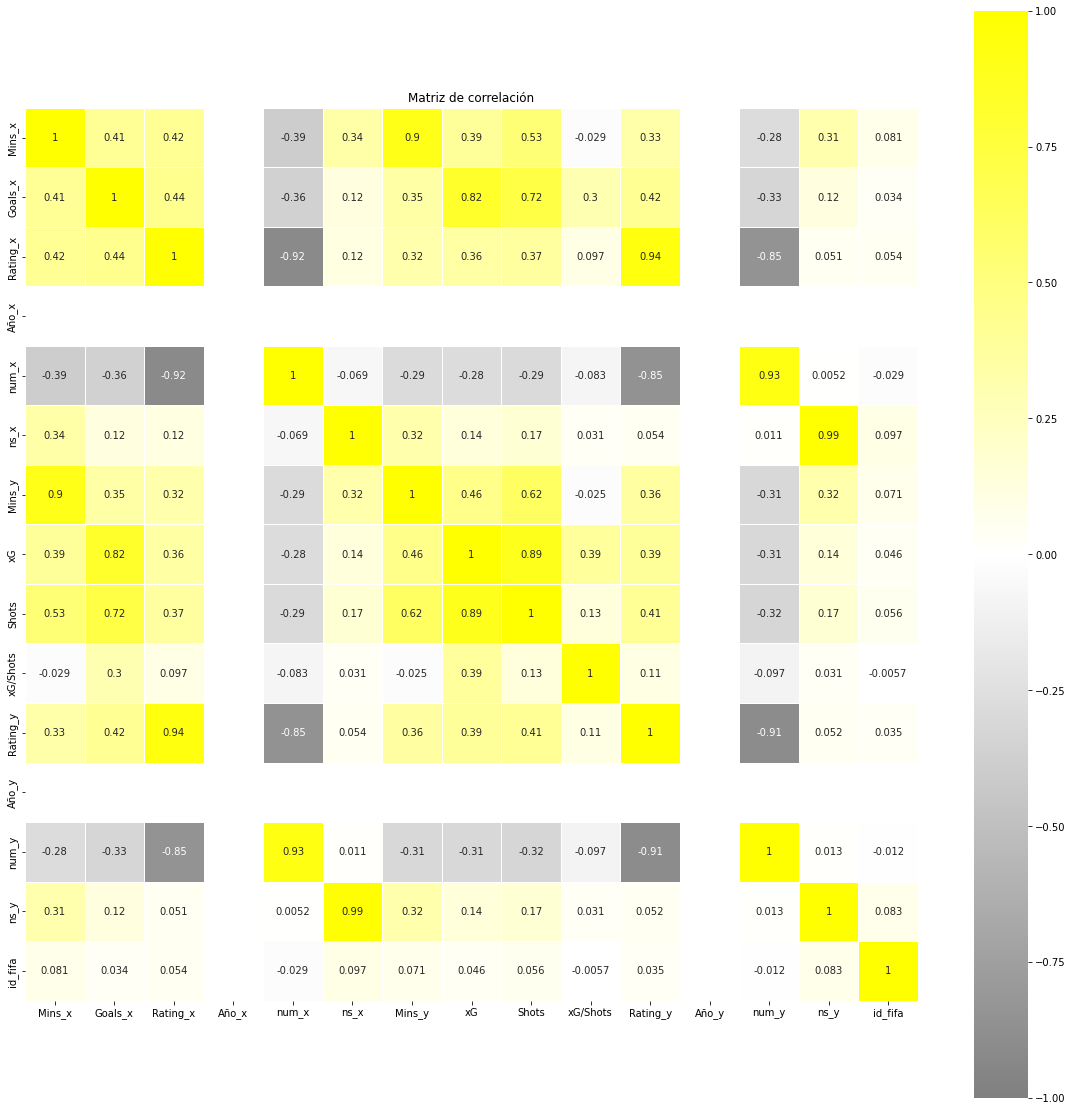

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Seleccionar solo las columnas numéricas y calcular la correlación
correlation_matrix = df_reales.select_dtypes(include=['number']).corr()

# Crear un colormap personalizado de amarillo a blanco a gris
custom_cmap = LinearSegmentedColormap.from_list('yellow_white_gray', ['gray', 'white', 'yellow'])

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, square=True, cbar=True, linewidths=.5, vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()


In [16]:

# df_inglesa = df_fifa22[df_fifa22["league_name"]=="Spain Primera Division", "English League One"]
# df_fifa22 = df_fifa22[df_fifa22["league_name"].isin(["Spain Primera Division", "English League One"])]

In [17]:
# df_goles.drop(columns=["Unnamed: 0"], inplace=True)
# df_goles22 = df_goles[df_goles["goles"] > 0]
# df_goles22.reset_index(drop=True, inplace=True)

In [18]:
# df_fifa22 = df_fifa22.rename(columns={"sofifa_id":"match_id"})

In [19]:
columns_to_drop = ["player_url","club_jersey_number","club_loaned_from","club_contract_valid_until","nation_position","nation_jersey_number","player_face_url","club_logo_url","club_flag_url","nation_logo_url","nation_flag_url"]
ns_cols = ["ls""st""rs""lw""lf""cf""rf""rw""lam""cam""ram""lm""lcm""cm""rcm""rm","lwb"]
desired_columns = ["match_id","short_name","shooting","pace","attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy","skill_ball_control","movement_acceleration","movement_sprint_speed","movement_agility","power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots","mentality_aggression","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","league_name"]

In [20]:
df = df_fifa22[desired_columns]
df.head()

KeyError: "['match_id'] not in index"

In [ ]:
df = df[df["shooting"].notna()]

In [ ]:
df = pd.merge(df,df_goles,on="match_id",how="left")

In [ ]:
df.head()

In [ ]:
df["goles"] = df["goles"].fillna(0)
df["goles"] = df["goles"].astype(int)

In [ ]:
df["pj"] = df["pj"].fillna(0)
df["pj"] = df["pj"].astype(int)

In [ ]:
df.head()

In [ ]:
desired_columns = ["match_id","short_name","shooting","pace","attacking_crossing","attacking_finishing","attacking_heading_accuracy",
                   "attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy","skill_ball_control","movement_acceleration",
                   "movement_sprint_speed","movement_agility","power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots",
                   "mentality_aggression","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","posicion","pj","goles"]
desired_columns = ["match_id","short_name","shooting","pace","attacking_crossing","attacking_finishing","attacking_heading_accuracy",
                   "attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy","skill_ball_control","movement_acceleration",
                   "movement_sprint_speed","movement_agility","power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots",
                   "mentality_aggression","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","posicion","goles"]

In [ ]:
# df_inglesa = df[df["league_name"]=="English League One"]
# df = df[df["league_name"]=="Spain Primera Division"]
df = df[desired_columns]

In [ ]:
goles = df[df["goles"]!=0]

In [ ]:
sns.displot(goles['goles']);

In [ ]:
# Seleccionar solo las columnas numéricas y calcular la correlación
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de correlación')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

X = df.select_dtypes(include="number").drop("goles",axis=1)
Y = df['goles']

# Paso 1: Escalar las características con MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, Y_train)

# Realizar predicciones con el conjunto de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Mostrar resultados
print(f"Mean Squared Error: {mse}")
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")


In [ ]:
# df_inglesa = df_fifa22[df_fifa22["league_name"]=="English League One"]

In [ ]:
# df_fifa22["league_name"].value_counts()
d = df_inglesa.select_dtypes(["number"])
d

# Modelo 2 Estadisticas reales-goles (con datos fifa?)

## Transformaciones datos básicas

In [41]:
df_fifa22 = pd.read_csv("../data/players_22.csv")
df_reales = pd.read_csv("../data/All_stats_2022_id.csv")

In [43]:
df_fifa22 = df_fifa22.rename(columns={"sofifa_id":"id_fiffa"})

In [44]:
# df_fifa22 = df_fifa22[["id_fifa","short_name", "overall","value_eur","shooting","skill_ball_control","skill_fk_accuracy","skill_fk_accuracy","mentality_penalties"]]
# df_fifa22 = df_fifa22[["id_fifa","overall","short_name","value_eur","shooting","skill_ball_control","mentality_penalties"]]
df_fifa22 = df_fifa22[["id_fifa","short_name","overall","shooting","value_eur"]]

In [45]:
# num_x
# equipo_x
# posicion_x
# df_reales = df_reales[["id_fifa","nom_jugad","Rating_x","Goals_x"]]
df_reales = df_reales[["nom_jugad","id_fifa", 'Apps_x', 'Mins_x', 'Assists', 'SpG', 'KeyP',
       'Drb', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating_x',
       'num_x', 'ns_x', 'posicion_x','Goals_x']]


In [46]:
# Función para separar los valores y sumarlos
def procesar_valor(valor):
    # Si hay paréntesis, extraemos ambos valores
    if '(' in valor:
        num1 = int(valor.split('(')[0])  # Valor antes de los paréntesis
        num2 = int(valor.split('(')[1].split(')')[0])  # Valor dentro de los paréntesis
        return num1 + num2  # Sumamos ambos valores
    else:
        return int(valor)  # Si no hay paréntesis, solo convertimos a int

# Aplicamos la función a cada valor de la columna y la guardamos en 'app_totales'
df_reales['app_totales'] = df_reales['Apps_x'].apply(procesar_valor)

In [47]:
df_reales.drop("Apps_x",axis=1,inplace=True)

In [48]:
df_reales.replace('-',0, inplace=True)
df_reales["Goals_x"]=df_reales["Goals_x"].astype(int)
df_reales["Assists"]=df_reales["Assists"].astype(int)
df_reales["SpG"]=df_reales["SpG"].astype(float)
df_reales["Drb"]=df_reales["Drb"].astype(float)
df_reales["Fouled"]=df_reales["Fouled"].astype(float)
df_reales["Off"]=df_reales["Off"].astype(float)
df_reales["Disp"]=df_reales["Disp"].astype(float)
df_reales["UnsTch"]=df_reales["UnsTch"].astype(float)
df_reales["Rating_x"]=df_reales["Rating_x"].astype(float)
df_reales["ns_x"]=df_reales["ns_x"].astype(float)
df_reales["KeyP"]=df_reales["KeyP"].astype(float)

In [49]:
df = pd.merge(df_fifa22, df_reales, on="id_fifa", how="outer")

In [50]:
df = df.dropna(subset=["short_name"])
df = df.dropna(subset=["nom_jugad"])
df = df.dropna(subset=["shooting"])

In [51]:
# Ordenar por short_name y luego por overall (de mayor a menor)
df = df.sort_values(by=['short_name', 'overall'], ascending=[True, False])

# Eliminar duplicados, manteniendo el primero (el de mayor overall)
df = df.drop_duplicates(subset='short_name', keep='first')


In [52]:
df["value_eur"]=df["value_eur"].astype(int)

In [53]:
df = df.drop(["nom_jugad","id_fifa","short_name","posicion_x"],axis=1)

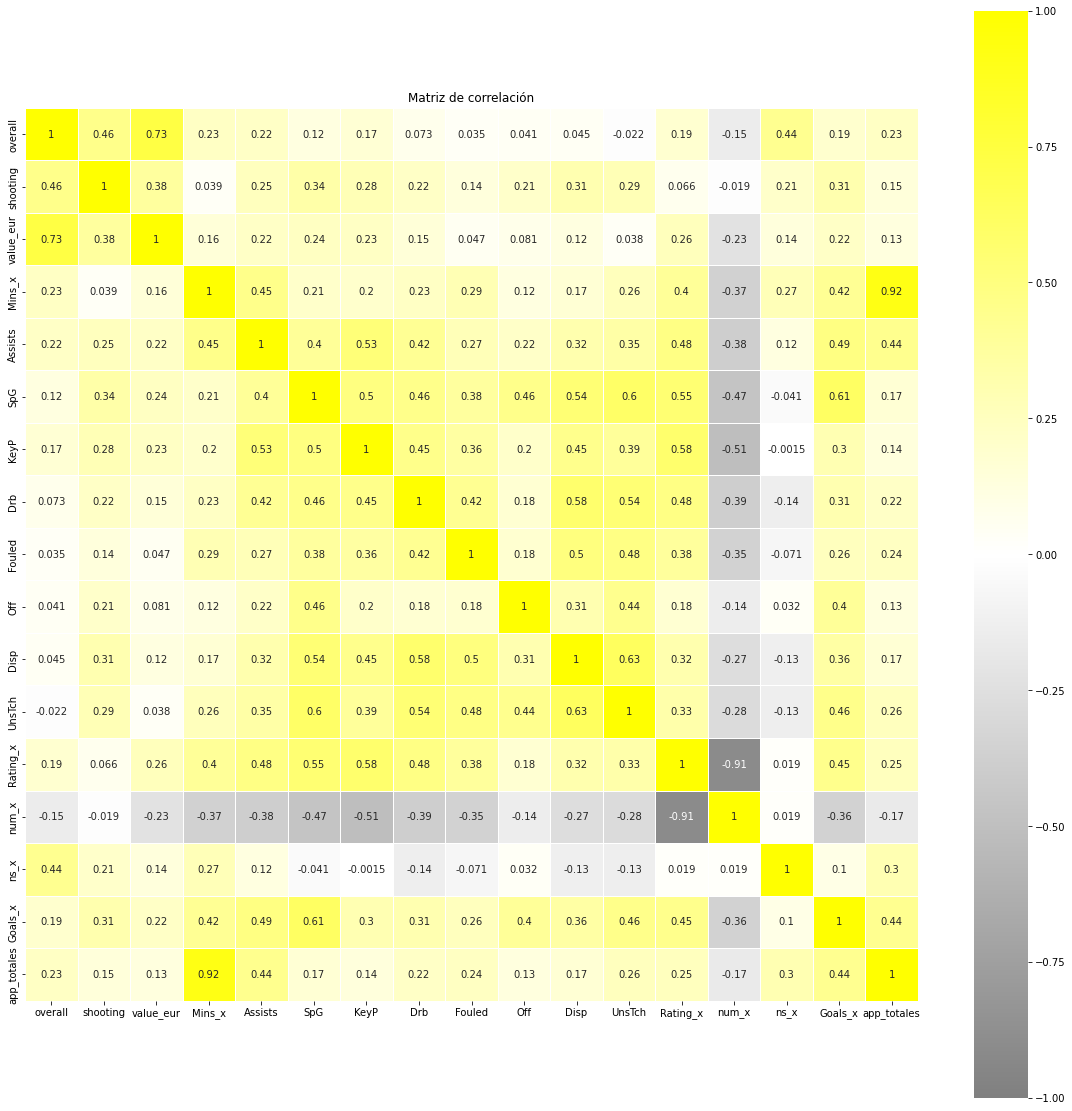

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Seleccionar solo las columnas numéricas y calcular la correlación
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Crear un colormap personalizado de amarillo a blanco a gris
custom_cmap = LinearSegmentedColormap.from_list('yellow_white_gray', ['gray', 'white', 'yellow'])

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, square=True, cbar=True, linewidths=.5, vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

In [ ]:
nom_guardar = '../models/Fifa-StatsReales_best_linear_model.pkl'

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle

# Seleccionar características y variable objetivo
X = df.select_dtypes(include="number").drop(["Goals_x"], axis=1)
Y = df['Goals_x']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

pipe = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', LinearRegression())
])

linear_params = {
    'scaler': [StandardScaler(), MinMaxScaler(), None],
    'classifier': [LinearRegression()]
}

search_space = [
    linear_params
]

gs = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10,
                  scoring='r2',
                  verbose=2,
                  n_jobs=-1)

gs.fit(X_train, Y_train)

# Guardar el mejor modelo en un archivo .pkl
best_model = gs.best_estimator_
with open(nom_guardar, 'wb') as file:
    pickle.dump(best_model, file)

# Evaluación del modelo
Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Resultados
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Mean Squared Error: 1.5394449113314157
Mean Absolute Error: 0.8372574239422028
R-squared: 0.45538505495350845


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import pickle

# Asumiendo que X y Y ya están definidos
# X es el conjunto de características, Y es el conjunto de etiquetas

# Dividimos los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Si también tienes un conjunto de validación, puedes hacer un split adicional:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Ahora aplicamos el StandardScaler
scaler = StandardScaler()

# Ajustamos el escalador con los datos de entrenamiento y transformamos X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transformamos X_test y X_valid con el mismo escalador
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

# Definir la arquitectura del modelo
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=X_train_scaled.shape[1:]),  # Capa densa de 64 neuronas con ReLU
    keras.layers.Dense(32, activation='relu'),  # Capa densa de 32 neuronas con ReLU
    keras.layers.Dense(1)  # Capa de salida, 1 neurona para la regresión
])

# Compilar el modelo
model.compile(loss="mean_squared_error",
              metrics=['mean_absolute_error'],  # Usamos el error cuadrático medio para regresión
              optimizer=keras.optimizers.Adam(learning_rate=0.001))  # Optimizer Adam con tasa de aprendizaje ajustada

# Ajuste del modelo a los datos escalados
history = model.fit(X_train_scaled, y_train,  # Entrenamos con los datos de entrenamiento escalados
                    epochs=50,  # Aumentamos las épocas para un mejor ajuste
                    batch_size=32,  # Tamaño de batch más grande para entrenamiento
                    validation_data=(X_valid_scaled, y_valid))  # Validación con los datos de validación escalados

# Guardar el mejor modelo en un archivo .pkl
nom_guardar = '../models/Fifa-StatsReales_best_RN_model.pkl'
with open(nom_guardar, 'wb') as file:
    pickle.dump(model, file)


Epoch 1/50


c:\python\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.3922 - mean_absolute_error: 0.8705 - val_loss: 1.7857 - val_mean_absolute_error: 0.8809
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9087 - mean_absolute_error: 0.9098 - val_loss: 1.6613 - val_mean_absolute_error: 0.8328
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6738 - mean_absolute_error: 0.7664 - val_loss: 1.6342 - val_mean_absolute_error: 0.8106
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6126 - mean_absolute_error: 0.7045 - val_loss: 1.4311 - val_mean_absolute_error: 0.7634
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7559 - mean_absolute_error: 0.7121 - val_loss: 1.3778 - val_mean_absolute_error: 0.7399
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4828 - mean_absolute_error: 0.7248 - val_loss: 1.4579 - val_mean_absolute_error: 0.7467
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2575 - mean_absolute_error: 0.6714 - val_loss: 1.2796 - val_me

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hacer predicciones sobre el conjunto de prueba
y_pred_test = model.predict(X_test_scaled)

# Hacer predicciones sobre el conjunto de validación
y_pred_valid = model.predict(X_valid_scaled)

# Evaluar en el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred_test)  # Error absoluto medio
mse_test = mean_squared_error(y_test, y_pred_test)  # Error cuadrático medio
r2_test = r2_score(y_test, y_pred_test)  # Coeficiente de determinación (R²)

# Evaluar en el conjunto de validación
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
r2_valid = r2_score(y_valid, y_pred_valid)

# Imprimir los resultados
print(f'Conjunto de prueba:')
print(f'MAE: {mae_test}')
print(f'MSE: {mse_test}')
print(f'R²: {r2_test}')

print(f'\nConjunto de validación:')
print(f'MAE: {mae_valid}')
print(f'MSE: {mse_valid}')
print(f'R²: {r2_valid}')
